# The Most Basic NN used for creating a TFLite Model

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import pathlib
from google.colab import files

%matplotlib inline

**Basic Model of y=mx+c**

In [2]:
xs = [-1, 0, 1, 2, 3, 4]
ys = [-3, -1, 1, 3, 5, 7]
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1, input_shape=[1])
])
model.compile(loss='mse', optimizer='sgd')
model.fit(xs,ys,epochs=200)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 59.1361
Epoch 2/200
1/1 [==============================] - 0s 3ms/step - loss: 46.9535
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 37.3600
Epoch 4/200
1/1 [==============================] - 0s 4ms/step - loss: 29.8037
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 23.8503
Epoch 6/200
1/1 [==============================] - 0s 3ms/step - loss: 19.1582
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 15.4586
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 12.5400
Epoch 9/200
1/1 [==============================] - 0s 3ms/step - loss: 10.2360
Epoch 10/200
1/1 [==============================] - 0s 3ms/step - loss: 8.4158
Epoch 11/200
1/1 [==============================] - 0s 4ms/step - loss: 6.9762
Epoch 12/200
1/1 [==============================] - 0s 6ms/step - loss: 5.8364
Epoch 13/200
1/1 [==============================] - 0

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.predict([10])

array([[18.448599]], dtype=float32)

### Generate a SavedModel

In [5]:
export_dir = 'tmp/saved_model'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: tmp/saved_model/assets


### convert the SavedModel to TFLite

In [6]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tf_lite_model = converter.convert()

In [7]:
tf_lite_model_file = pathlib.Path('/tmp/model.tflite')
tf_lite_model_file.write_bytes(tf_lite_model)

896

### **Initialize the Interpreter to try it out**

In [8]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tf_lite_model)
interpreter.allocate_tensors()

# Get input and Output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [12]:
input_details, output_details

([{'dtype': numpy.float32,
   'index': 0,
   'name': 'serving_default_dense_input:0',
   'quantization': (0.0, 0),
   'quantization_parameters': {'quantized_dimension': 0,
    'scales': array([], dtype=float32),
    'zero_points': array([], dtype=int32)},
   'shape': array([1, 1], dtype=int32),
   'shape_signature': array([-1,  1], dtype=int32),
   'sparsity_parameters': {}}],
 [{'dtype': numpy.float32,
   'index': 3,
   'name': 'StatefulPartitionedCall:0',
   'quantization': (0.0, 0),
   'quantization_parameters': {'quantized_dimension': 0,
    'scales': array([], dtype=float32),
    'zero_points': array([], dtype=int32)},
   'shape': array([1, 1], dtype=int32),
   'shape_signature': array([-1,  1], dtype=int32),
   'sparsity_parameters': {}}])

In [11]:
#Test the tensorflow Lite model on random input datat.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _  in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tf_lite_results = interpreter.get_tensor(output_details[0]['index'])

  #Test the TensorFlow model in random input data
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)

  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

### Visualize the Model

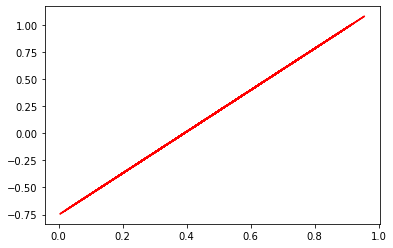

In [13]:
plt.plot(inputs, outputs, 'r')
plt.show()

### **Download the TFLite model file**

In [14]:
files.download(tf_lite_model_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>